In [14]:
import torch
from IPython import display
from d2l import torch as d2l

In [15]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [16]:
num_inputs = 784
num_outputs = 10
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)
W.shape[0]
b.shape

torch.Size([10])

In [17]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition #这里运用了广播机制

In [18]:
X = torch.normal(0, 1, (2,5))
X_prob = softmax(X)
X_prob,X_prob.sum(1, keepdim=True)

(tensor([[0.0970, 0.1444, 0.6493, 0.0317, 0.0775],
         [0.1175, 0.1259, 0.6172, 0.0768, 0.0626]]),
 tensor([[1.],
         [1.]]))

In [19]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

创建一个数据y_hat,其中包含2个样本在3个类别的预测概率，使用y作为y_hat中概率的索引

In [20]:
#对待第0个样本，看它预测为第0类别的概率；对待第1个样本，看它预测为第2个类别的概率
y = torch.tensor([0,2])
y_hat = torch.tensor([[0.1, 0.3, 0.6],[0.3, 0.2, 0.5]])
y_hat[[0,1],y]#意思是指在y_hat[0,0]、y_hat[1,2]处取值

tensor([0.1000, 0.5000])

In [21]:
#定义交叉熵损失函数
def cross_entropy(y_hat, y):
    '''
    即索引y轴，在x轴上根据labels抽取预测值
    '''
    return -torch.log(y_hat[range(len(y_hat)), y])
cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [22]:
#将预测类别与真实y元素进行比较
def accuracy(y_hat, y):
    '''计算预测正确的数量'''
    if len(y_hat.shape)>1 and y_hat.shape[1]>1:
        y_hat = y_hat.argmax(axis=1)#axis=1，沿着行方向行进，找出在每一行中最大概率对应的下标
    cmp = y_hat.type(y.dtype) == y
    return float(cmp
    return d2l.sgd([W, b], lr, batch_size).type(y.dtype).sum())

accuracy(y_hat,y) /len(y)

SyntaxError: invalid syntax (<ipython-input-22-ba3681b68e74>, line 8)

In [23]:
#可以评估在任意模型net的准确率
def evaluate_accuracy(net, data_iter):
    '''计算在指定数据集上模型的精度'''
    if isinstance(net, torch.nn.Module):
        net.eval()#将模型设置为评估模式
    metric = Accumulator(2)# 正确预测数、预测总数
    for X, y in data_iter:
        metric.add(accuracy(net(X),y), y.numel())
    return metric[0] / metric[1]

In [24]:
class Accumulator:  #@save
    """在`n`个变量上累加。"""
    def __init__(sel
    return d2l.sgd([W, b], lr, batch_size)f, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

SyntaxError: invalid syntax (<ipython-input-24-cbff147cdae9>, line 4)

In [12]:
evaluate_accuracy(net, test_iter)

NameError: name 'Accumulator' is not defined

In [45]:
#softmax回归模型训练
def train_epoch_ch3(net, train_iter, loss, updater):
    if isinstance(net, torch.nn.Module):
        net.train()
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(
                float(l) * leailab@AILAB:~/桌面/DeepLearningWuHao/李沐深度学习/李沐深度学习/09 softmax回归+损
失函数+图片分类数据集$ jupyter notebook
[I 2021-11-16 16:50:49.469 LabApp] JupyterLab extension loaded from /home/ailab/anaconda3/lib/python3.8/site-packages/jupyterlab
[I 2021-11-16 16:50:49.469 LabApp] JupyterLab application directory is /home/ailab/anaconda3/share/jupyter/lab
[I 16:50:49.471 NotebookApp] 启动notebooks 在本地路径: /home/ailab/桌面/DeepLearningWuHao/李沐深度学习/李沐深度学习/09 softmax回归+损失函数+图片分类数据集
[I 16:50:49.471 NotebookApp] Jupyter Notebook 6.3.0 is running at:
[I 16:50:49.471 NotebookApp] http://localhost:8888/?token=8b0a184c5c41d6c33dbed53dd29f06d160db322d11793650
[I 16:50:49.471 NotebookApp]  or http://127.0.0.1:8888/?token=8b0a184c5c41d6c33dbed53dd29f06d160db322d11793650
[I 16:50:49.471 NotebookApp] 使用control-c停止此服务器并关闭所有内核(两次跳过确认).
n(y), accuracy(y_hat, y),
                y.size().numel())
        else:
            l.sum().backward()
            updater(X.shape[0])
            metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    return metric[0] / metric[2], metric[1] / metric[2]

In [46]:
class Animator:  #@save
    """在动画中绘制数据。"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [47]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型。"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [48]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

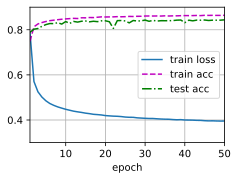

In [50]:
num_epochs = 50ailab@AILAB:~/桌面/DeepLearningWuHao/李沐深度学习/李沐深度学习/09 softmax回归+损
失函数+图片分类数据集$ jupyter notebook
[I 2021-11-16 16:50:49.469 LabApp] JupyterLab extension loaded from /home/ailab/anaconda3/lib/python3.8/site-packages/jupyterlab
[I 2021-11-16 16:50:49.469 LabApp] JupyterLab application directory is /home/ailab/anaconda3/share/jupyter/lab
[I 16:50:49.471 NotebookApp] 启动notebooks 在本地路径: /home/ailab/桌面/DeepLearningWuHao/李沐深度学习/李沐深度学习/09 softmax回归+损失函数+图片分类数据集
[I 16:50:49.471 NotebookApp] Jupyter Notebook 6.3.0 is running at:
[I 16:50:49.471 NotebookApp] http://localhost:8888/?token=8b0a184c5c41d6c33dbed53dd29f06d160db322d11793650
[I 16:50:49.471 NotebookApp]  or http://127.0.0.1:8888/?token=8b0a184c5c41d6c33dbed53dd29f06d160db322d11793650
[I 16:50:49.471 NotebookApp] 使用control-c停止此服务器并关闭所有内核(两次跳过确认).

train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

**学麻了**